In [30]:
import nibabel as nib
import nilearn.plotting as nplot
import trimesh
import numpy as np
import os
import matplotlib.pyplot as plt
from niworkflows.viz.utils import cuts_from_bbox
import nilearn.image as nimg
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


In [7]:
# Set up example file
sub = 'sub-UP1UP10206'
scratch = '/scratch/jjeyachandra/niviz/data/'
space = 'MNINonLinear'
surf_space = "fsaverage_LR32k"
func = "ses-01_task-rest_run-1_bold"

In [14]:
shortname = {
    "Native": 'native',
    "fsaverage_LR32k": "32k_fs_LR",
    "": "164k_fs_LR"
}
volname = {
    "T1w": "T1w_acpc_dc.nii.gz",
    "MNINonLinear": "T1w.nii.gz"
}
l_surf = nib.load(
    os.path.join(
        scratch, sub, space, surf_space,
    f'{sub}.L.pial.{shortname[surf_space]}.surf.gii'
))
r_surf = nib.load(
    os.path.join(
        scratch, sub, space, surf_space,
    f'{sub}.R.pial.{shortname[surf_space]}.surf.gii'
))

t1 = nib.load(
    os.path.join(
        scratch, sub, space, volname[space]
    )
)

# Load and resample to T1
epi = nib.load(
    os.path.join(
        scratch, sub, space, "Results", func,
        f"{func}.nii.gz"
    )
).slicer[:,:,:,0]
epi = nimg.resample_to_img(epi, t1, interpolation="linear")

In [65]:
# Need to define a colormap with transparency built in
import matplotlib.colors as mcolors

In [149]:
# Custom colormap with transparencies
ncolors = 256
basecmap = 'viridis_r'
color_array = plt.get_cmap(basecmap)(range(ncolors))
color_array[:, -1] = np.linspace(1.0, 0.0, ncolors)

# Set background intensity=0 to transparent
color_array[0, :] = 0
cmapviridis = mcolors.LinearSegmentedColormap.from_list(
    basecmap,colors=color_array
)

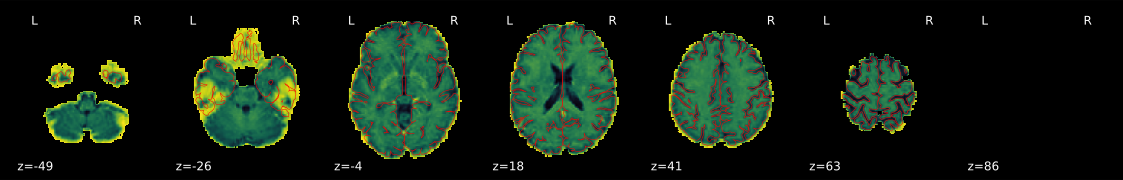

In [150]:
# Change this to `t1` and remove `cmap=cmapviridis`
# Then uncomment last line to get EPI over T1 w/surfs
zh = nplot.plot_epi(epi, display_mode='z', cut_coords=cuts['z'],
                   cmap=cmapviridis)
f = plt.gcf()
a = plt.gca()

for z, s in zip(cuts['z'], sections):
    ax = zh.axes[z].ax
    if s:
        for segs in s.discrete:
            ax.plot(*segs.T, color='r', linewidth=0.5)        
    
    # Plot each EPI view
    
# 
#zh.add_overlay(epi,cmap=cmapviridis)